In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
filename='/content/drive/MyDrive/Coding Dojo/Week 8/processed.cleveland.data'
df=pd.read_csv(filename,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# EDA and Data Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
# 0 is absence, 1,2,3,4 = present
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [9]:
#`simplify target variable to no disease 0 and disease 1
df['num']=[0 if num == 0 else 1 for num in df['num']]

In [10]:
df['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

# Continuous Variables

In [11]:
continuous_feature=['age','trestbps','chol','thalach','oldpeak']

In [12]:
df[continuous_feature].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


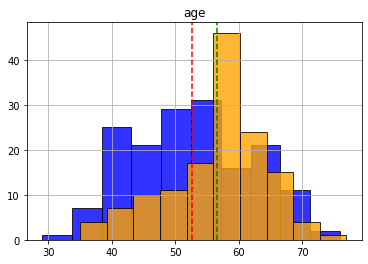

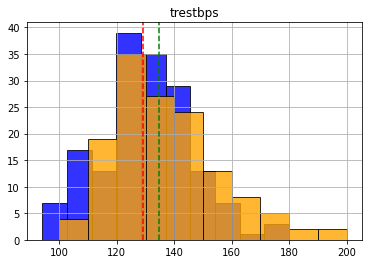

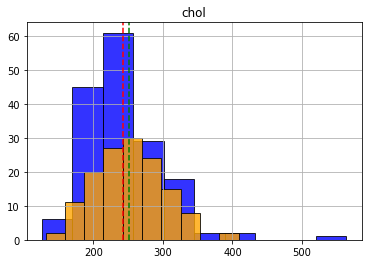

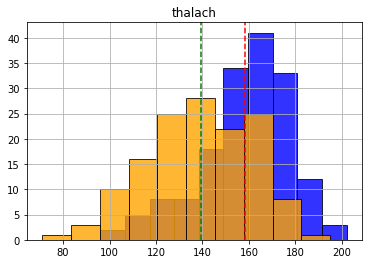

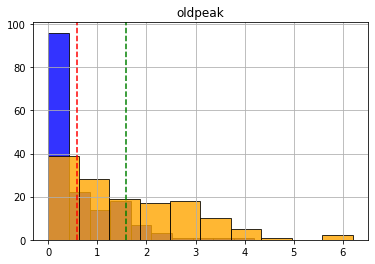

In [13]:
for feature in continuous_feature:
  df[df['num']==0][feature].hist(alpha=0.8,color='blue',edgecolor='k')
  plt.axvline(df[df['num']==0][feature].mean(),color='r',linestyle='dashed')
  df[df['num']==1][feature].hist(alpha=0.8,color='orange',edgecolor='k')
  plt.axvline(df[df['num']==1][feature].mean(),color='green',linestyle='dashed')
  plt.title(feature)
  plt.show()

As shown on the graphs, the average age in disease group is higher and most of the cases occur in 55-65 age group. The average resting bp is higher in disease group. The average max heart rate achieved is lower in disease group compared with no disease group. In disease group, ST depression induced by exercise is larger.

# Categorical Variables

In [18]:
categorical_feature=['sex','cp','fbs','restecg','exang','slope','ca','thal']
for feature in categorical_feature:
  print(df[feature].value_counts())

1.0    206
0.0     97
Name: sex, dtype: int64
4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64
0.0    258
1.0     45
Name: fbs, dtype: int64
0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64
0.0    204
1.0     99
Name: exang, dtype: int64
1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64


In [24]:
# drop the rows with ?
df.drop(df[(df['ca']=='?') | (df['thal']=='?')].index, inplace=True)

In [27]:
print(df['ca'].value_counts())
print(df['thal'].value_counts())

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64
3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64


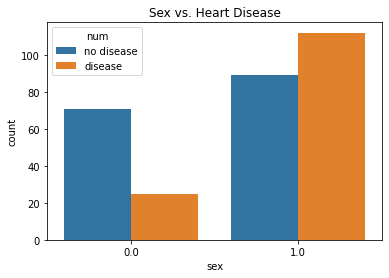

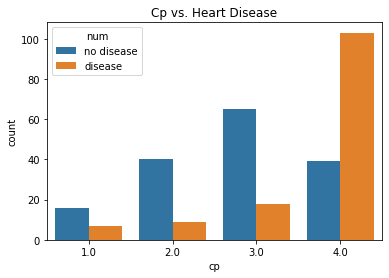

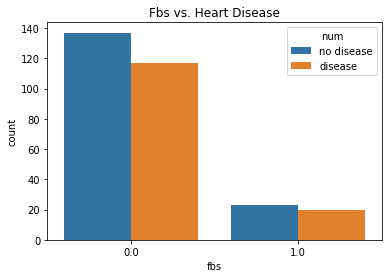

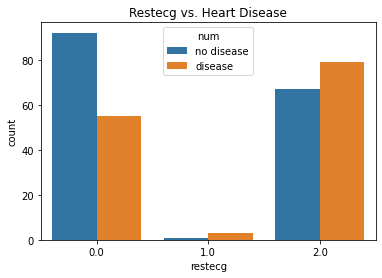

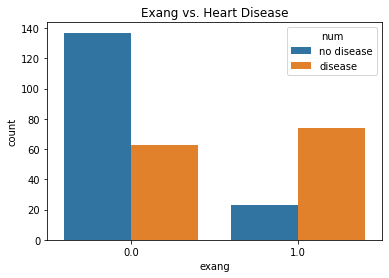

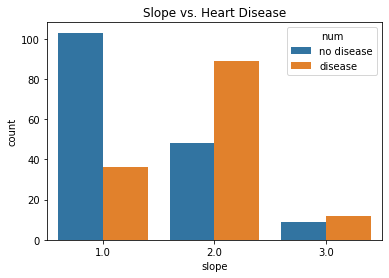

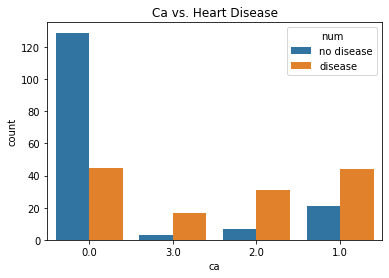

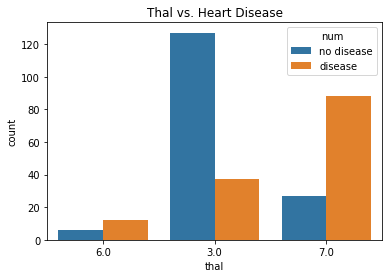

In [28]:
categorical_feature=['sex','cp','fbs','restecg','exang','slope','ca','thal']
df1=df.copy()
df1['num']=df1['num'].apply(lambda x: 'no disease' if x==0 else 'disease')
for feature in categorical_feature:
  sns.countplot(data=df1,x=feature,hue='num')
  plt.title(feature.capitalize()+' vs. Heart Disease')
  plt.show()


*   Sex: 0 being female and 1 being male. Heart disease occur more in males.
*   For chest pain (1: typical angina, 2: atypical angina, 3: non-anginal pain 4: asymptomatic), most of heart disease cases occur in asymptomatic group.
*   For rectecg, the group with abnormality with ST-T or left ventricular hypertrophy has more heart disease cases.
*   For exercise induced angina, if yes, the person will be more likely to have heart disease.
*   For slope, there are more heart disease cases in the group with flat ST segment
*   For thal (3=normal, 6=fixed defect, 7=reversable defect), there are more heart disease cases in the reversable defect group.








